<a href="https://colab.research.google.com/github/alihasanhashmi/datasets/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install ctgan
!pip install table_evaluator
!pip install sdv
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
copulas 0.7.0 requires matplotlib<4,>=3.4.0; python_version >= "3.7", but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sdv.tabular import CTGAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [23]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/exfil_monogram.csv')
dataset_malware = pd.read_csv('/content/drive/MyDrive/dataset/exfil_monogram.csv')
modelCTGAN = CTGAN()
modelCTGAN.fit(dataset_malware)
#dataset with synthetic data
synthetic = modelCTGAN.sample(num_rows=200)
malware = dataset_malware.append(synthetic) 
shuffled_malware = malware.sample(frac=1)
features_malware = shuffled_malware.drop(columns = ['Label']).copy()
label_malware = shuffled_malware['Label']
#Lab1 Model
features = dataset.drop(columns = ['Label']).copy()
label = dataset['Label']
#splitting dataset
features_train, features_test, label_train, label_test = train_test_split(features,label , train_size=0.8)
features_val, features_val_test, label_val, label_val_test = train_test_split(features_test,label_test, test_size=0.5)
#splitting synthetic dataset
features_malware_train, features_malware_test, label_malware_train, label_malware_test = train_test_split(features_malware, label_malware, train_size=0.8)
features_malware_val, features_malware_val_test, label_malware_val, label_malware_val_test = train_test_split(features_malware_test, label_malware_test, test_size=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

In [24]:
#train the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(120, 1)),
  tf.keras.layers.Conv1D(1, 70, 5),
  tf.keras.layers.MaxPool1D(),
  tf.keras.layers.Flatten(name='regions'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/60
154/154 [==============================] - 1s 6ms/step - loss: 105.4395 - accuracy: 0.5829 - val_loss: 21.6993 - val_accuracy: 0.6759
Epoch 2/60
154/154 [==============================] - 1s 4ms/step - loss: 16.8511 - accuracy: 0.7264 - val_loss: 10.1745 - val_accuracy: 0.7622
Epoch 3/60
154/154 [==============================] - 1s 4ms/step - loss: 8.5310 - accuracy: 0.7645 - val_loss: 5.3305 - val_accuracy: 0.7785
Epoch 4/60
154/154 [==============================] - 1s 4ms/step - loss: 4.8370 - accuracy: 0.7811 - val_loss: 3.4052 - val_accuracy: 0.7834
Epoch 5/60
154/154 [==============================] - 1s 4ms/step - loss: 3.2748 - accuracy: 0.8044 - val_loss: 2.4173 - val_accuracy: 0.8290
Epoch 6/60
154/154 [==============================] - 1s 4ms/step - loss: 2.3273 - accuracy: 0.8162 - val_loss: 1.8177 - val_accuracy: 0.8388
Epoch 7/60
154/154 [==============================] - 1s 4ms/step - loss: 1.6277 - accuracy: 0.8255 - val_loss: 1.3542 - val_accuracy: 0.8485
E

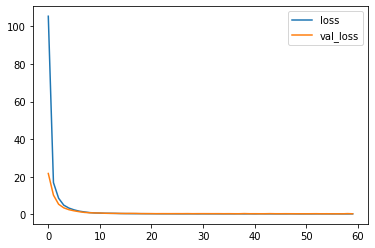

In [25]:
#plotting learning curve of the model
History = model.fit(features_train, label_train, validation_data=(features_val, label_val), epochs=60)
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label='val_loss')
plt.legend();

print('\n\n')
print(model.evaluate(features_val, label_val))

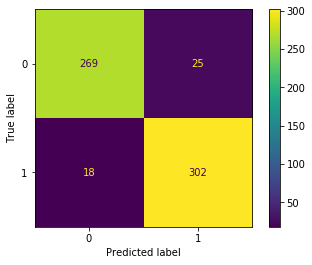




accuracy : 0.9299674267100977
precision : 0.9235474006116208
The recall : 0.94375
The f1 score : 0.9335394126738794


In [26]:
p_test = model.predict(features_val) > 0.5 
cm = confusion_matrix(label_val, p_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('\n\n')
print(f'accuracy : {accuracy_score(label_val, p_test)}')
print(f'precision : {precision_score(label_val, p_test, zero_division=1)}')
print(f'The recall : {recall_score(label_val, p_test)}')
print(f'The f1 score : {f1_score(label_val, p_test)}')

In [27]:
#train the Sythetic Model
model_2 = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(120, 1)),
tf.keras.layers.Conv1D(1, 70, 5),
tf.keras.layers.MaxPool1D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
159/159 [==============================] - 1s 4ms/step - loss: 214.8755 - accuracy: 0.4937 - val_loss: 19.2169 - val_accuracy: 0.4716
Epoch 2/20
159/159 [==============================] - 1s 4ms/step - loss: 17.0477 - accuracy: 0.5968 - val_loss: 7.9718 - val_accuracy: 0.6215
Epoch 3/20
159/159 [==============================] - 1s 4ms/step - loss: 5.4614 - accuracy: 0.7009 - val_loss: 3.9433 - val_accuracy: 0.7256
Epoch 4/20
159/159 [==============================] - 1s 3ms/step - loss: 3.1336 - accuracy: 0.7573 - val_loss: 3.0864 - val_accuracy: 0.7445
Epoch 5/20
159/159 [==============================] - 1s 3ms/step - loss: 2.4975 - accuracy: 0.7912 - val_loss: 2.5546 - val_accuracy: 0.7981
Epoch 6/20
159/159 [==============================] - 1s 3ms/step - loss: 2.0297 - accuracy: 0.8182 - val_loss: 2.1422 - val_accuracy: 0.7997
Epoch 7/20
159/159 [==============================] - 1s 3ms/step - loss: 1.5699 - accuracy: 0.8385 - val_loss: 1.7275 - val_accuracy: 0.8218
Ep

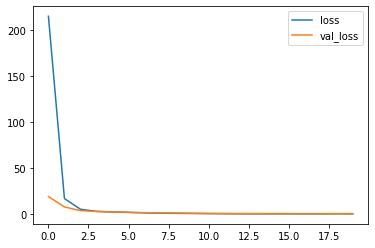

In [28]:
#plotting learning curve of the model
History_2 = model_2.fit(features_malware_train, label_malware_train, validation_data=(features_malware_val, label_malware_val), epochs=20)
plt.plot(History_2.history['loss'], label='loss')
plt.plot(History_2.history['val_loss'], label='val_loss')
plt.legend();

print('\n\n')
print(model_2.evaluate(features_malware_val, label_malware_val))

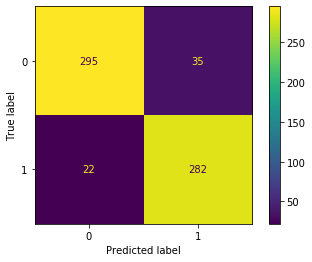




accuracy : 0.9100946372239748
precision : 0.889589905362776
The recall : 0.9276315789473685
The f1 score : 0.9082125603864736


In [30]:
p_malware_test = model.predict(features_malware_val) > 0.5 
cm1 = confusion_matrix(label_malware_val, p_malware_test)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)

disp1.plot()
plt.show()

print('\n\n')
print(f'accuracy : {accuracy_score(label_malware_val, p_malware_test)}')
print(f'precision : {precision_score(label_malware_val, p_malware_test, zero_division=1)}')
print(f'The recall : {recall_score(label_malware_val, p_malware_test)}')
print(f'The f1 score : {f1_score(label_malware_val, p_malware_test)}')

In [31]:
SM = SMOTE(random_state=42)
features_res, label_res = SM.fit_resample(features_malware, label_malware)

SMx_train, SMx_test, SMy_train, SMy_test = train_test_split(features_res, label_res, train_size=0.8)
SMx_val, SMx__sub_test, SMy_val, SMy_sub_test = train_test_split(features_res, label_res, test_size=0.5)

In [32]:
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(120, 1)),
tf.keras.layers.Conv1D(1, 70, 5),
tf.keras.layers.MaxPool1D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r_smote = model.fit(SMx_train, SMy_train, validation_data=(SMx_val, SMy_val), epochs=20)

Epoch 1/20
167/167 [==============================] - 1s 6ms/step - loss: 18.8879 - accuracy: 0.7003 - val_loss: 8.3462 - val_accuracy: 0.7667
Epoch 2/20
167/167 [==============================] - 1s 4ms/step - loss: 5.0085 - accuracy: 0.8155 - val_loss: 3.9688 - val_accuracy: 0.8096
Epoch 3/20
167/167 [==============================] - 1s 4ms/step - loss: 2.9229 - accuracy: 0.8427 - val_loss: 3.4193 - val_accuracy: 0.8453
Epoch 4/20
167/167 [==============================] - 1s 5ms/step - loss: 2.3790 - accuracy: 0.8615 - val_loss: 2.6240 - val_accuracy: 0.8489
Epoch 5/20
167/167 [==============================] - 1s 4ms/step - loss: 1.9790 - accuracy: 0.8786 - val_loss: 2.5289 - val_accuracy: 0.8279
Epoch 6/20
167/167 [==============================] - 1s 5ms/step - loss: 1.9136 - accuracy: 0.8821 - val_loss: 1.7866 - val_accuracy: 0.8910
Epoch 7/20
167/167 [==============================] - 1s 5ms/step - loss: 1.6228 - accuracy: 0.8911 - val_loss: 1.8880 - val_accuracy: 0.8925
Epoch




105/105 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.9051
[0.5743770003318787, 0.9051051139831543]


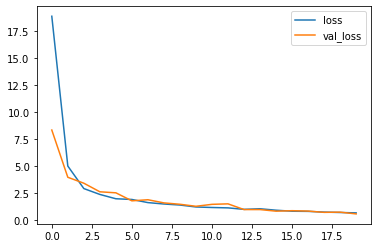

In [33]:
plt.plot(r_smote.history['loss'], label='loss')
plt.plot(r_smote.history['val_loss'], label='val_loss')
plt.legend();


print('\n\n')
print(model.evaluate(SMx_val, SMy_val))

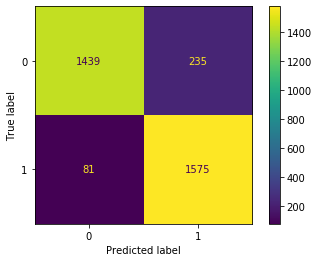




accuracy : 0.9051051051051051
precision : 0.8701657458563536
The recall : 0.9510869565217391
The f1 score : 0.9088286208886324


In [34]:
p_SM_test = model.predict(SMx_val) > 0.5 
cm2 = confusion_matrix(SMy_val, p_SM_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

disp2.plot()
plt.show()

print('\n\n')
print(f'accuracy : {accuracy_score(SMy_val, p_SM_test)}')
print(f'precision : {precision_score(SMy_val, p_SM_test, zero_division=1)}')
print(f'The recall : {recall_score(SMy_val, p_SM_test)}')
print(f'The f1 score : {f1_score(SMy_val, p_SM_test)}')